<a href="https://colab.research.google.com/github/stonewallmhk/Datascience/blob/master/WHO_Airquality_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform an exploratory data analysis on global air quality data to identify patterns, trends, and potential correlations between air pollution levels and public health outcomes. Analyze various pollutants (PM2.5, PM10, NO2, etc.) across different cities and regions to understand the factors contributing to poor air quality and its potential health impacts.

Data URL:[WHO Air Quality Dataset_Jan_2024](https://www.who.int/publications/m/item/who-ambient-air-quality-database-(update-jan-2024))

--- Values Guidline ---
https://www.who.int/teams/environment-climate-change-and-health/air-quality-and-health/health-impacts/types-of-pollutants
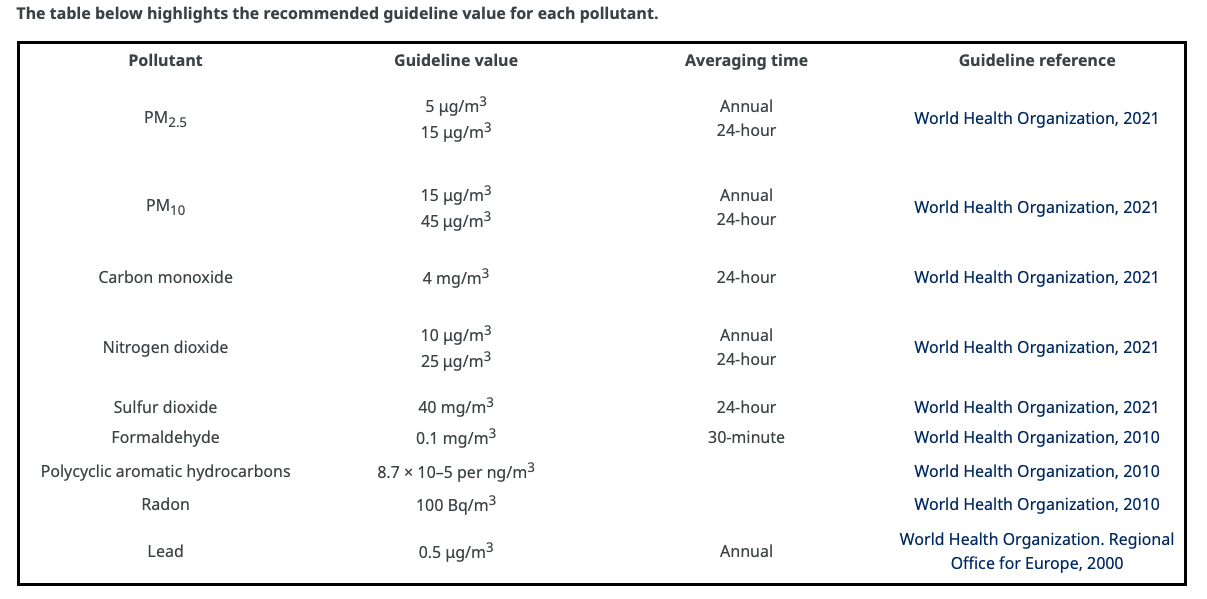

In [2]:
# Import libraries
import pandas as pd
import numpy as np

In [3]:
# Connect to google drive

from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [4]:
# import data
filename = '/content/drive/MyDrive/Data/AirQuality_WHO_012024.csv'
data = pd.read_csv(filename)
data.shape

(40098, 20)

In [5]:
data.columns

Index(['who_region', 'iso3', 'country_name', 'city', 'year', 'version',
       'pm10_concentration', 'pm25_concentration', 'no2_concentration',
       'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov', 'type_of_stations',
       'reference', 'web_link', 'population', 'population_source', 'latitude',
       'longitude', 'who_ms'],
      dtype='object')

### Column Description


* who_region: WHO region classification
* iso3: Country code
* country_name
* city
* year: year of data
* version: Version of WHO database
* pm10_concentration: Annual mean concentration of Particle Matter 10
* pm25_concentration: Annual mean concentration of Particle Matter 2.5
* no2_concentration: Annual mean concentration of NO2
* _tempcov: Percentage of year for which data was measured. pm10_tempcov = 1 , means 1% of the year
*   remaining columns are not considered in this analysis



In [6]:
data.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,46.0,93.0,"Urban, Urban, Suburban",NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,88.0,95.0,"Urban, Urban, Suburban",NaN,NaN,247604.0,NaN,43.368033,-8.418233,1
2,4_Eur,ESP,Spain,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,71.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
3,4_Eur,ESP,Spain,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,98.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
4,4_Eur,ESP,Spain,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,97.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1


## Descriptive Analysis:
1. Descriptive Analysis Questions:

* What is the average level of PM10, PM2.5, and NO2 across different cities and countries?
* Which cities or countries have the highest and lowest average concentrations of PM10, PM2.5, and NO2?
* What is the distribution of air quality measurements (PM10, PM2.5, NO2) across different WHO regions?
* What is the proportion of cities or regions exceeding the WHO recommended air quality limits for PM10, PM2.5, and NO2?
* What is the range of temporal coverage (tempcov columns) for air quality measurements? Are there any patterns in temporal coverage across different regions or cities?

In [7]:
# understand data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40098 entries, 0 to 40097
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          40098 non-null  object 
 1   iso3                40098 non-null  object 
 2   country_name        40098 non-null  object 
 3   city                40098 non-null  object 
 4   year                40095 non-null  float64
 5   version             40098 non-null  object 
 6   pm10_concentration  28672 non-null  float64
 7   pm25_concentration  21730 non-null  float64
 8   no2_concentration   26934 non-null  float64
 9   pm10_tempcov        22403 non-null  float64
 10  pm25_tempcov        16590 non-null  float64
 11  no2_tempcov         23402 non-null  float64
 12  type_of_stations    23331 non-null  object 
 13  reference           6652 non-null   object 
 14  web_link            1790 non-null   object 
 15  population          22433 non-null  float64
 16  popu

In [11]:
data.describe()

,year,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,population,latitude,longitude,who_ms
count,40095.000000,28672.000000,21730.000000,26934.000000,22403.000000,16590.000000,23402.000000,2.243300e+04,40098.000000,40098.000000,40098.000000
mean,2016.232672,30.016375,19.130923,18.861620,88.732134,84.124533,88.092214,7.571931e+05,40.024341,10.598472,0.998803
std,3.116678,29.548575,17.490027,25.845061,20.277271,26.819096,23.149637,2.123730e+06,16.309381,57.774989,0.034578
min,2010.000000,0.730000,1.000000,0.002000,0.000000,0.000000,0.000000,5.000000e+00,-53.158316,-159.366240,0.000000
25%,2014.000000,16.264750,8.603250,10.163250,90.000000,86.000000,92.000000,5.300600e+04,37.138800,-1.258900,1.000000
50%,2016.000000,21.335500,12.710500,16.700000,96.000000,96.000000,96.000000,1.637290e+05,43.822900,10.512933,1.000000
75%,2019.000000,30.515500,23.000000,24.911500,99.000000,99.000000,98.000000,5.900320e+05,49.163367,23.226400,1.000000
max,2022.000000,540.000000,436.440000,3670.314000,100.000000,100.000000,100.000000,3.739313e+07,69.677498,178.450000,1.000000


**Inspect each column values**

In [8]:
data.who_region.unique()

array(['4_Eur', '6_Wpr', '2_Amr', '5_Emr', '1_Afr', '3_Sear', '7_NonMS'],
      dtype=object)

In [10]:
data.iso3.unique()

array(['ESP', 'CHN', 'DEU', 'CHE', 'DNK', 'NOR', 'CAN', 'BEL', 'IRN',
       'MEX', 'GEO', 'ITA', 'USA', 'GBR', 'SAU', 'FRA', 'ARE', 'GHA',
       'TUR', 'ETH', 'AUS', 'IND', 'ISR', 'CYP', 'GRC', 'KWT', 'FIN',
       'HUN', 'SWE', 'ISL', 'JOR', 'QAT', 'CRI', 'PRT', 'ROU', 'NZL',
       'DZA', 'AUT', 'ECU', 'BRA', 'NLD', 'CHL', 'KOR', 'MDG', 'COL',
       'BGR', 'TKM', 'KAZ', 'PRY', 'PER', 'IRL', 'MLT', 'POL', 'THA',
       'LBN', 'BLR', 'IRQ', 'CMR', 'PHL', 'ARG', 'BTN', 'IDN', 'KHM',
       'SVK', 'MNE', 'VEN', 'BGD', 'LUX', 'MYS', 'MUS', 'CZE', 'ZAF',
       'SRB', 'MAR', 'BIH', 'KGZ', 'MKD', 'TUN', 'EGY', 'VNM', 'SVN',
       'JPN', 'BOL', 'LKA', 'BEN', 'SEN', 'HRV', 'DOM', 'LTU', 'ALB',
       'TJK', 'NPL', 'AND', 'PAK', 'GTM', 'BHR', 'NGA', 'AFG', 'UGA',
       'EST', 'MMR', 'MNG', 'UKR', 'JAM', 'CUB', 'LVA', 'MDV', 'KEN',
       'MCO', 'URY', 'TZA', 'RUS', 'BHS', 'PAN', 'TTO', 'PRI', 'SLV',
       'SGP', 'FJI', 'UZB', 'HND', 'LIE', 'LAO'], dtype=object)